### Read an EDF file and convert it to Parquet files using the EdfToParquetConverter class directly.

In [ ]:
import pytz

from edf2parquet.converters import EdfToParquetConverter

my_edf_file_path = "path_to_my_edfile.edf"  # REPLACE WITH YOUR EDF FILE PATH
my_parquet_output_dir = "path_to_my_parquet_output_dir"  # REPLACE WITH YOUR PARQUET OUTPUT DIRECTORY

converter = EdfToParquetConverter(edf_file_path=my_edf_file_path,
                                  datetime_index=True,
                                  local_timezone=(pytz.timezone("Europe/Zurich"), pytz.timezone("Europe/Zurich")),
                                  parquet_output_dir=my_parquet_output_dir,
                                  compression_codec="GZIP")

converter.convert()

### Read a converted Parquet file using plain pandas.

In [1]:
my_parquet_file_path = "edf2parquet/tests/test_resources/EEG T5-LE.parquet"

<Axes: >

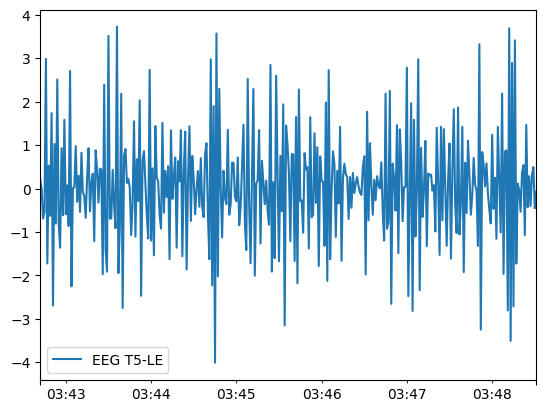

In [2]:
import pandas as pd

df = pd.read_parquet("edf2parquet/tests/test_resources/EEG T5-LE.parquet")
df.resample("1s").mean().iloc[:1000].plot()

### Read a converted Parquet file using the ParquetReader class directly.

<Axes: >

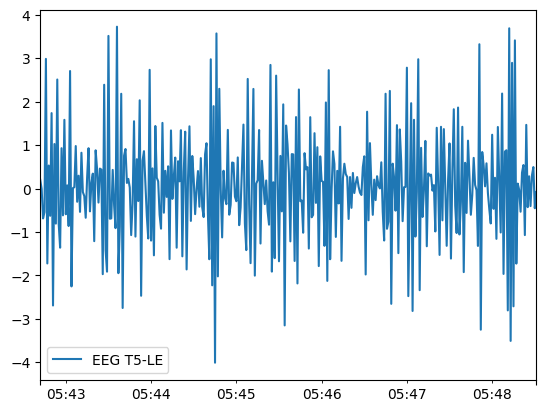

In [5]:
from edf2parquet.readers import ParquetReader

reader = ParquetReader(parquet_file_path=my_parquet_file_path)
df = reader.get_pandas_dataframe(set_timezone=True) # (Note that here we set a timezone which is different to when we used plain pandas)
df.resample("1s").mean().iloc[:1000].plot()

In [6]:
reader.get_file_header()

{'technician': 'EEG',
 'recording_additional': 'SN:007840',
 'patientname': '10-FEB-1980',
 'patient_additional': 'XX',
 'patientcode': '',
 'equipment': 'tech',
 'admincode': '1.D3WMNSEm EO',
 'gender': '',
 'startdate': Timestamp('2017-07-22 05:42:42+0200', tz='Europe/Paris'),
 'birthdate': 'F',
 'tz_recording': 'Europe/Paris',
 'tz_startdatetime': 'Europe/Paris'}

In [7]:
reader.get_signal_headers()

[{'label': 'EEG T5-LE',
  'dimension': 'uV',
  'sample_rate': 256,
  'physical_max': 3277.0,
  'physical_min': -3277.0,
  'digital_max': 32767,
  'digital_min': -32768,
  'prefilter': 'HP:0.1Hz LP:60Hz',
  'transducer': 'transducer8'}]

### Read an EDF file using the EdfReader class directly.

<Axes: >

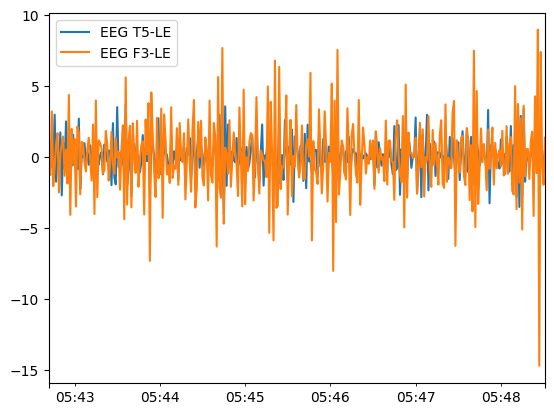

In [16]:
from edf2parquet.readers import EdfReader
my_edf_file_path = "edf2parquet/tests/test_resources/temp_test.edf"
reader = EdfReader(edf_file_path=my_edf_file_path)
reader.get_pandas_dataframe("EEG T5-LE", "EEG F3-LE", set_timezone=False).resample("1s").mean().iloc[:1000].plot()